# There is no plan bee without them 🐝

## Abstract
Pollinators around the world play a central role in our agriculture with an estimated economic benefit of €235bn per year. Up to 75% of our crops are dependent on pollination and honeybees account for most of it. Yet, in Europe and the USA the bee population has been declining at an alarming rate during the last decades. As by-hand pollination is not an alternative, it is impossible to imagine a world without them. [1]

With this project, we first aim at giving insights about the state of bee health and honey produced and traded using the [FAO datasets](http://www.fao.org/faostat/en/#data). Secondly, we focus on the USA using results from [US Departement of Agriculture](https://quickstats.nass.usda.gov/) in order to identify and present the main factors of bee decline. Finally, we propose a case study about almonds in California to show the consequences of a lack of bees.

[[1](http://sos-bees.org/wp-content/uploads/2014/04/BeesInDecline.pdf)] *Bees in Decline*, Greenpeace, 2013



In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## 1. How do the continents compare in terms of bee decline from 1961 to these days?

Robin

## 2. How do changes in honey production relate to number of beehives in Europe and the USA?

Robin

## 3. What are the consequences of bee decline on the patterns of honey import/export around the world?

Eric

# 4. US Case Study: Colony Collapse Disorder (CCD)

The cause (or causes) of **Colony Collapse Disorder (CCD)** is not quite clear. It is thought to have several plausible causes, including:

- Pesticide use
- Environmental stresses
- Bee pests (most specifically the Varroa)

In this section, we investigate the influence of bee pests.

In [35]:
loss_all = pd.read_excel("data/Bee Colony Loss.xlsx")
varroa_all = pd.read_csv("data/USDA_varroa.csv")

In [36]:
# State codes
states = {'alaska': 'AK',
 'alabama': 'AL',
 'arkansas': 'AR',
 'american samoa': 'AS',
 'arizona': 'AZ',
 'california': 'CA',
 'colorado': 'CO',
 'connecticut': 'CT',
 'district of columbia': 'DC',
 'delaware': 'DE',
 'florida': 'FL',
 'georgia': 'GA',
 'guam': 'GU',
 'hawaii': 'HI',
 'iowa': 'IA',
 'idaho': 'ID',
 'illinois': 'IL',
 'indiana': 'IN',
 'kansas': 'KS',
 'kentucky': 'KY',
 'louisiana': 'LA',
 'massachusetts': 'MA',
 'maryland': 'MD',
 'maine': 'ME',
 'michigan': 'MI',
 'minnesota': 'MN',
 'missouri': 'MO',
 'northern mariana islands': 'MP',
 'mississippi': 'MS',
 'montana': 'MT',
 'national': 'NA',
 'north carolina': 'NC',
 'north dakota': 'ND',
 'nebraska': 'NE',
 'new hampshire': 'NH',
 'new jersey': 'NJ',
 'new mexico': 'NM',
 'nevada': 'NV',
 'new york': 'NY',
 'ohio': 'OH',
 'oklahoma': 'OK',
 'oregon': 'OR',
 'pennsylvania': 'PA',
 'puerto rico': 'PR',
 'rhode island': 'RI',
 'south carolina': 'SC',
 'south dakota': 'SD',
 'tennessee': 'TN',
 'texas': 'TX',
 'utah': 'UT',
 'virginia': 'VA',
 'virgin islands': 'VI',
 'vermont': 'VT',
 'washington': 'WA',
 'wisconsin': 'WI',
 'west virginia': 'WV',
 'wyoming': 'WY'}

### Varroa preprocessing

In [37]:
varroa_all.head(3)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2019,JAN THRU MAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...",TOTAL,NOT SPECIFIED,14.8,NaN
1,SURVEY,2019,JAN THRU MAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",TOTAL,NOT SPECIFIED,45.6,NaN
2,SURVEY,2019,JAN THRU MAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...",TOTAL,NOT SPECIFIED,22.7,NaN


In [38]:
VARROA_TO_KEEP = ['Year', 'Period', 'State', 'Data Item', 'Value']
varroa_all = varroa_all[VARROA_TO_KEEP]

varroa_all.columns = [column.strip().lower() for column in varroa_all.columns]

In [39]:
varroa_all['data item'].value_counts()

HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES                   802
HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES    799
SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $                            7
HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL VARROA MITES) - INVENTORY, MEASURED IN PCT OF COLONIES        3
Name: data item, dtype: int64

In [40]:
# We get rid of 'SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $'
varroa_all = varroa_all[varroa_all['data item'] != 'SUPPLIES & REPAIRS, APIARY, VARROA CONTROL & TREATMENT - EXPENSE, MEASURED IN $']

# We get rid of US totals (which gets rid of the above HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL VARROA MITES) - INVENTORY, MEASURED IN PCT OF COLONIES)
varroa_all = varroa_all[varroa_all.state != 'US TOTAL']

# States => lowercase => 2-letters symbol
varroa_all.state = varroa_all.state.apply(str.lower)
varroa_all.replace(to_replace=states, inplace=True) 

In [41]:
for value in varroa_all.value:
    try:
        float(value)
    except:
        print(value)

 (Z)
 (Z)
 (Z)
 (Z)
 (Z)


In [42]:
varroa_all = varroa_all[varroa_all.value != ' (Z)']
varroa_all.value = varroa_all.value.apply(float)

# Replace month ranges (e.g. 'JAN THRU MARCH') by quarters
quarters = {
    'JAN THRU MAR': 'Q1',
    'APR THRU JUN': 'Q2',
    'JUL THRU SEP': 'Q3',
    'OCT THRU DEC': 'Q4'
}

varroa_all.replace(to_replace=quarters, inplace=True) 

# Discard 2019 (not enough data, and it's not over)
varroa_all = varroa_all[varroa_all.year != 2019]

In [43]:
# We separate Varroa from Non-varroa
varroa = varroa_all[varroa_all['data item'] == 'HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES']
varroa.drop(columns=['data item'], inplace=True)

non_varroa = varroa_all[varroa_all['data item'] == 'HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES']
non_varroa.drop(columns=['data item'], inplace=True)

/home/heimdall/Anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
varroa.head(3)

,year,period,state,value
98,2018,Q1,AL,29.2
100,2018,Q1,AZ,36.3
102,2018,Q1,AR,21.1


### Loss preprocessing


In [45]:
loss_all.head(3)

,Year,Season,State,Total Annual Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State
0,2016/17,Annual,Massachusetts,0.159,87,0.943,27186,0.023
1,2016/17,Annual,Montana,0.171,21,0.524,35905,0.003
2,2016/17,Annual,Nevada,0.230,13,0.923,2512,0.052


As per the [source](https://data.world/finley/bee-colony-statistical-data-from-1987-2017), **Total annual loss** is the percentage of colony lost during that year

In [46]:
# Cleaning 

# Clean header
loss_all.columns = [column.strip().lower() for column in loss_all.columns]

# Season is always Annual 
loss_all.drop('season', axis=1, inplace=True)

# 2016/17 => 2016
loss_all.year = loss_all.year.apply(lambda x: int(x[:-3]))

# lowercase the state and convert to 2-letters symbol
loss_all.state = loss_all.state.apply(str.lower)
loss_all.replace(to_replace=states, inplace=True) 

# Convert 0.2 => 20%
loss_all['total annual loss'] *= 100

In [47]:
loss_all.head(3)

,year,state,total annual loss,beekeepers,beekeepers exclusive to state,colonies,colonies exclusive to state
0,2016,MA,15.9,87,0.943,27186,0.023
1,2016,MT,17.1,21,0.524,35905,0.003
2,2016,NV,23.0,13,0.923,2512,0.052


# Where are the bees dying ?

## Average amount of colonies per State 
#### 2010-2016

First we need to **better understand how the states compares to each other**.

To answer this question, we plot the amount of colonies per state.

In [48]:
loss_all['total annual loss (colonies)'] = loss_all['total annual loss']/100*loss_all['colonies']

loss_per_state = loss_all.groupby('state').mean().reset_index()


In [49]:
loss_per_state.dropna(inplace=True)

In [50]:
loss_per_state.head()

,state,year,total annual loss,beekeepers,beekeepers exclusive to state,colonies,colonies exclusive to state,total annual loss (colonies)
1,AL,2013.0,35.942857,32.000000,0.951857,645.142857,0.843571,246.218000
2,AR,2013.0,37.642857,41.857143,0.926000,3188.285714,0.526143,1137.565143
3,AZ,2013.0,40.614286,7.571429,0.829429,988.142857,0.475714,333.740857
4,CA,2013.0,35.714286,187.428571,0.689857,380262.285714,0.136286,141950.298429
5,CO,2013.0,38.442857,124.142857,0.975143,24208.714286,0.508857,7977.655286


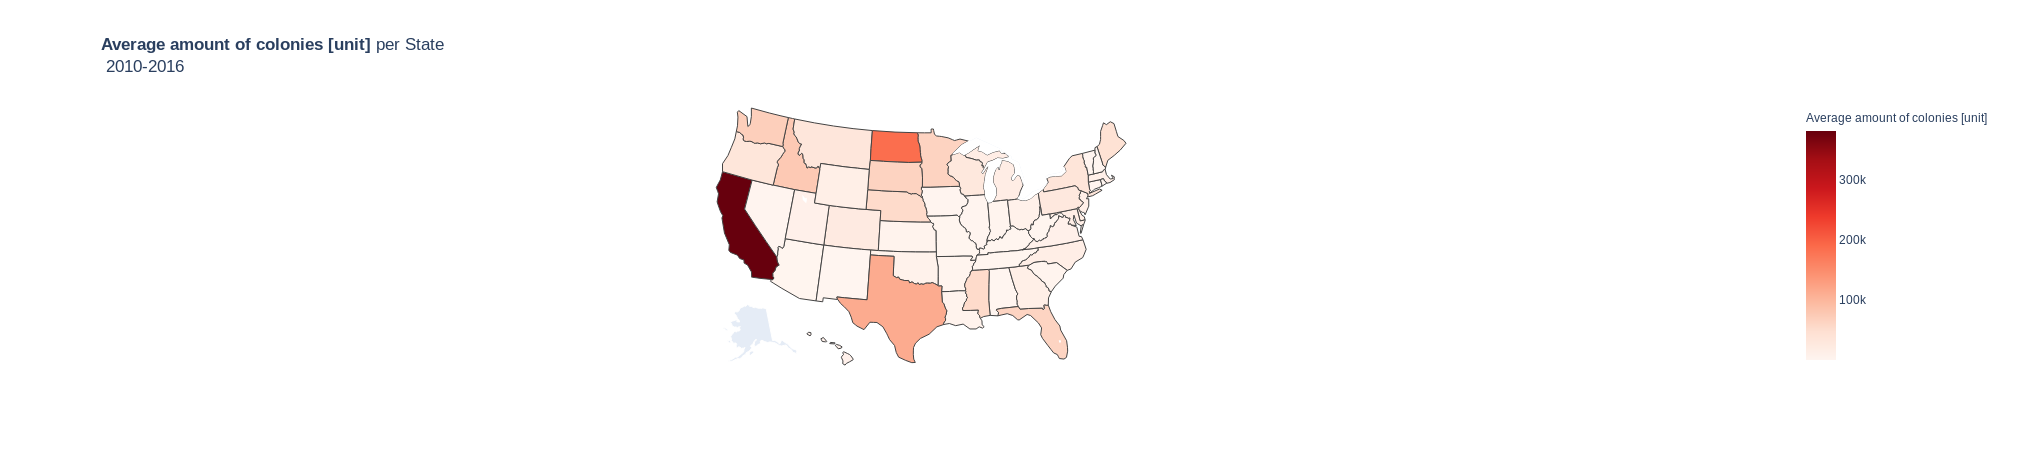

In [51]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['colonies'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average amount of colonies [unit]',
))

fig.update_layout(
    title_text = '<b>Average amount of colonies [unit]</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis

As we can see, the three states with the most colonies are **California**, **North-Dakota** and **Texas**. 

This makes sense because of **migratory beekeeping**. Indeed, nowadays, most of a beekeeper's revenue comes from renting his bees to polinisation. [[1]](???)

**California** produces **80% of the world's almond production** [[2]](https://www.marketwatch.com/story/almond-crunch-california-drought-withers-world-supply-2014-03-11), and they rely heavily on honeybees for their polinization. [[3]](https://theconversation.com/a-bee-economist-explains-honey-bees-vital-role-in-growing-tasty-almonds-101421). The blooming period is during the first quarter, from February to March.

Then, beekeepers move their bees to **North-Dakota** where lots of the honey is produced by gorging on alfalfa, sunflowers and clovers.

They also go to **Texas**, to polinate pumpkins and cucumbers.

Another hotspot is **Florida**, where bees are needed to polinate blueberries, tupelos and brazilian pepper, all the way from February to September. [[4]](https://www.scientificamerican.com/article/migratory-beekeeping-mind-boggling-math/)

These migratory patterns can also be seen by how many of the colonies are actually exclusive to their state (see below). 
As we can see, **very little of the colonies** (1%-13%) in those four states are exlusive to it.


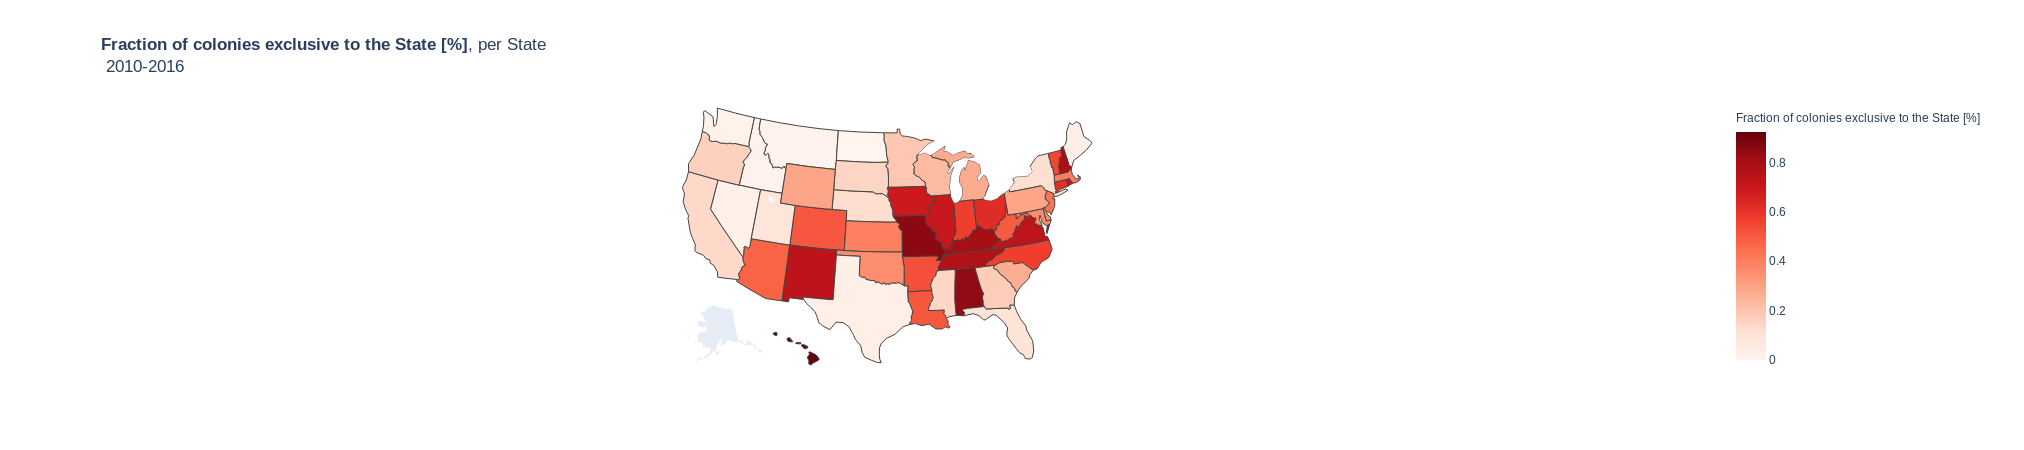

In [52]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['colonies exclusive to state'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Fraction of colonies exclusive to the State [%]',
))

fig.update_layout(
    title_text = '<b>Fraction of colonies exclusive to the State [%]</b>, per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

## Yearly loss of colonies [%]
#### 2010-2016

Now that we know where the colonies are located, where are they dying ?

We here investigate the **average yearly colony loss** for 2010-2016. That is, we want to know the percentage of colonies lost each year throughout the US.

Text(0, 0.5, 'Yearly colony loss [%]')

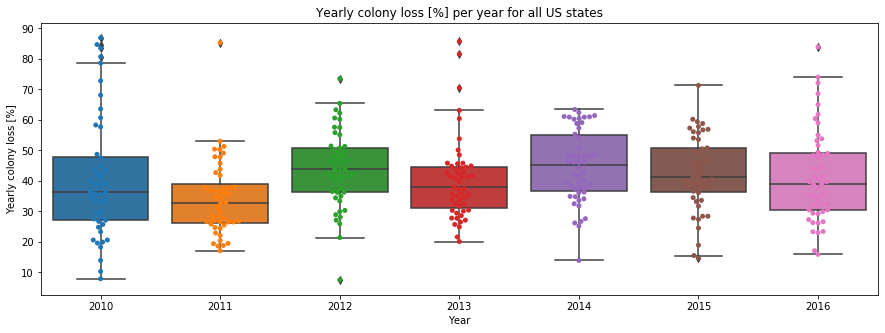

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(y='total annual loss', x='year', data=loss_all)
sns.swarmplot(y='total annual loss', x='year', data=loss_all)
plt.title('Yearly colony loss [%] per year for all US states')
plt.xlabel('Year')
plt.ylabel('Yearly colony loss [%]')

### Analysis:

In all the states, colonies are being lost. Between 2010 and 2016, the **median yearly colony loss** is roughly **stable**, albeit **very high** (~40%). Additionally, we have a **lot of variance**, with values ranging from 10% to 90%.

## Average yearly loss of colonies [%] per State
#### 2010-2016


We see in the previous boxplot that the **yearly colony losses are well spread out** (with values ranging from 10 to 90%).

We now investigate how each state compares in terms of **average yearly loss of colonies**, to see if there are any major discrepancies. That is, do some states have consistantly bigger losses ?

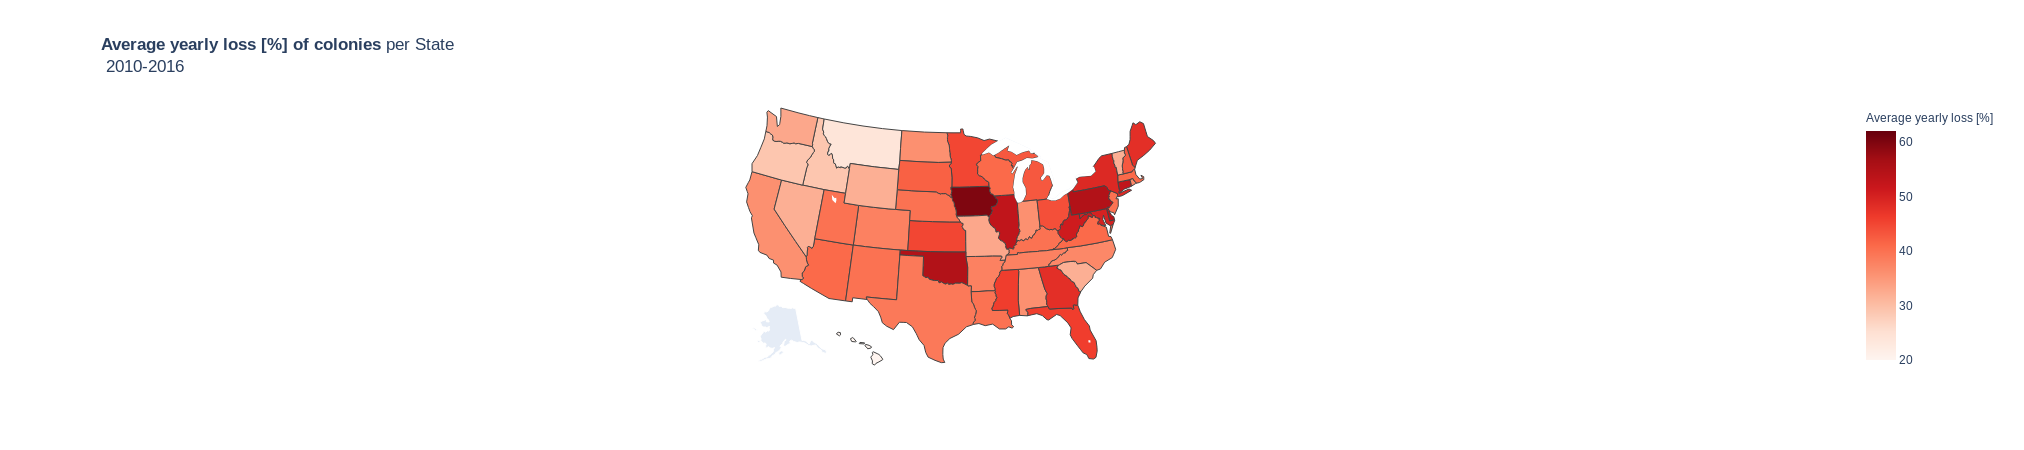

In [54]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['total annual loss'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average yearly loss [%]',
))

fig.update_layout(
    title_text = '<b>Average yearly loss [%] of colonies</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis

As we can see, the **average yearly loss** accross the US is **quite high**, and **affects all states**. There is however  **more colony loss on the east coast** than the west coast. But how does that translate in terms of **amount of colonies lost** ?


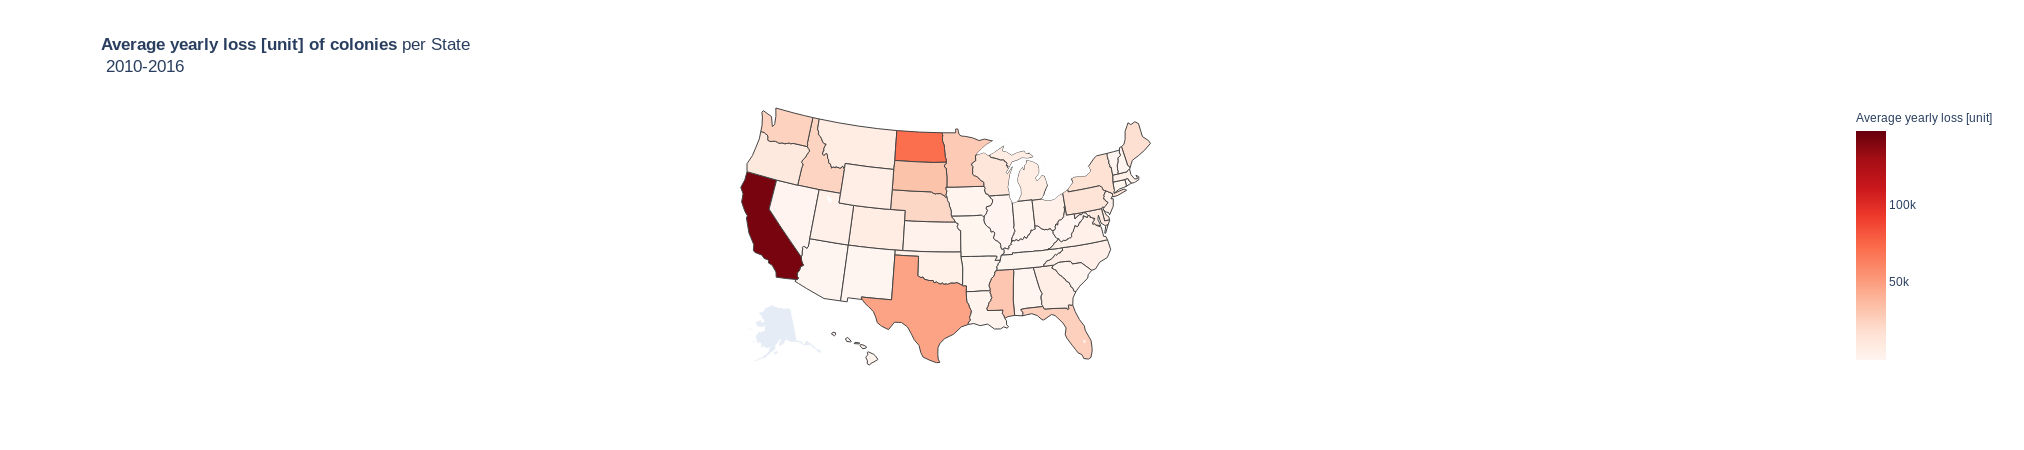

In [55]:
fig = go.Figure(data=go.Choropleth(
    locations=loss_per_state['state'],
    z=loss_per_state['total annual loss (colonies)'].astype(float).apply(round),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Average yearly loss [unit]',
))

fig.update_layout(
    title_text = '<b>Average yearly loss [unit] of colonies</b> per State <br> 2010-2016 ',
    geo_scope='usa', # limite map scope to USA
    dragmode=False
)

fig.show()

### Analysis 

As we can see, more bees are dying in **California**, **North-Dakota** and **Texas**, which is where most bees are located. 
This makes sense given the migratory patterns we have seen.

# Why are the bees dying ?

Now that we know where in the US they are dying, we will investigate possible reasons for this downfall.

Several factors are thought to be culprits of the CCD (Colony Collapse Disorder). Amongst which :

- Bee pests 
- Pesticide use 

We will now investigate those two factors.

## Bee pests 

Bees can be affected by several pests. The most well known of which is the **Varroa Mite**: a little bug, smaller than the bee, that attaches itself onto a bee and slowly kills it.

We will now investigate this pest.

In [56]:
varroa.head(3)

,year,period,state,value
98,2018,Q1,AL,29.2
100,2018,Q1,AZ,36.3
102,2018,Q1,AR,21.1


In [57]:
non_varroa.head(3)

,year,period,state,value
97,2018,Q1,AL,30.2
99,2018,Q1,AZ,4.3
101,2018,Q1,AR,9.6


## Varroa per season
#### 2015-2019

How does the fraction of colonies affected by the Varroa evolve throughout seasons ? 

Text(0, 0.5, 'Fraction of colonies affected the by Varroa [%]')

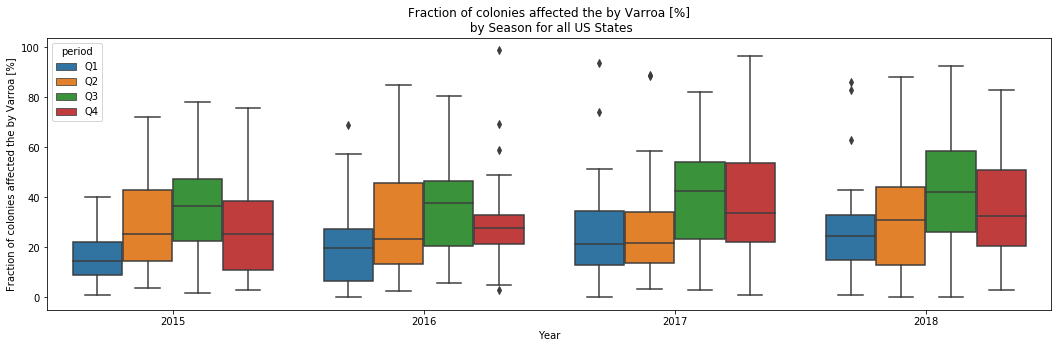

In [58]:
plt.figure(figsize=(18,5))
sns.boxplot(y='value', x='year', hue='period', data=varroa)
plt.title('Fraction of colonies affected the by Varroa [%]\n by Season for all US States')
plt.xlabel('Year')
plt.ylabel('Fraction of colonies affected the by Varroa [%]')

### Analysis

As we can see, the **fraction of colonies infected increased from winter to summer** before plummetting in automn. This makes sense since the Varroa is sensitive to the drop in temperature.

## Fraction of colonies affected by Varroa Mites in summer and winter
#### 2015-2019

We have now seen that the Varroa Mites are the most populous in summer, but how spread out is the Varroa throughout the US ?

To answer this, we plot the fraction of colonies affected by the Varroa when it is at both peaks, i.e. in summer and winter

In [111]:
varroa_per_state = varroa.groupby(['state', 'period']).mean()['value'].reset_index()

varroa_per_state.head(3)

,state,period,value
0,AL,Q1,20.825
1,AL,Q2,17.350
2,AL,Q3,55.450


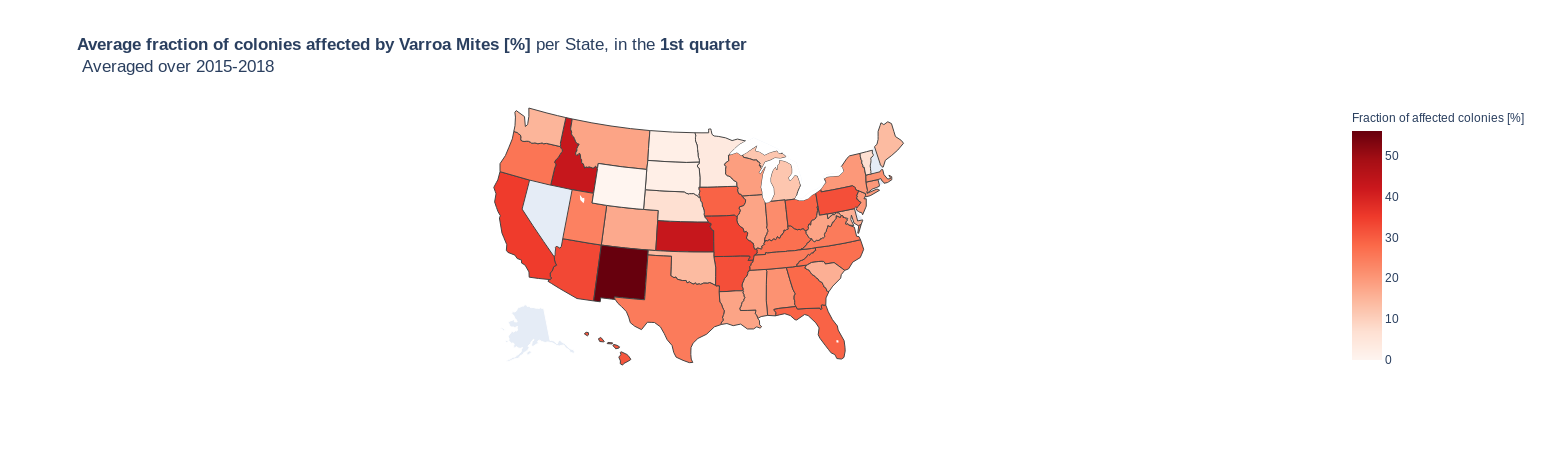

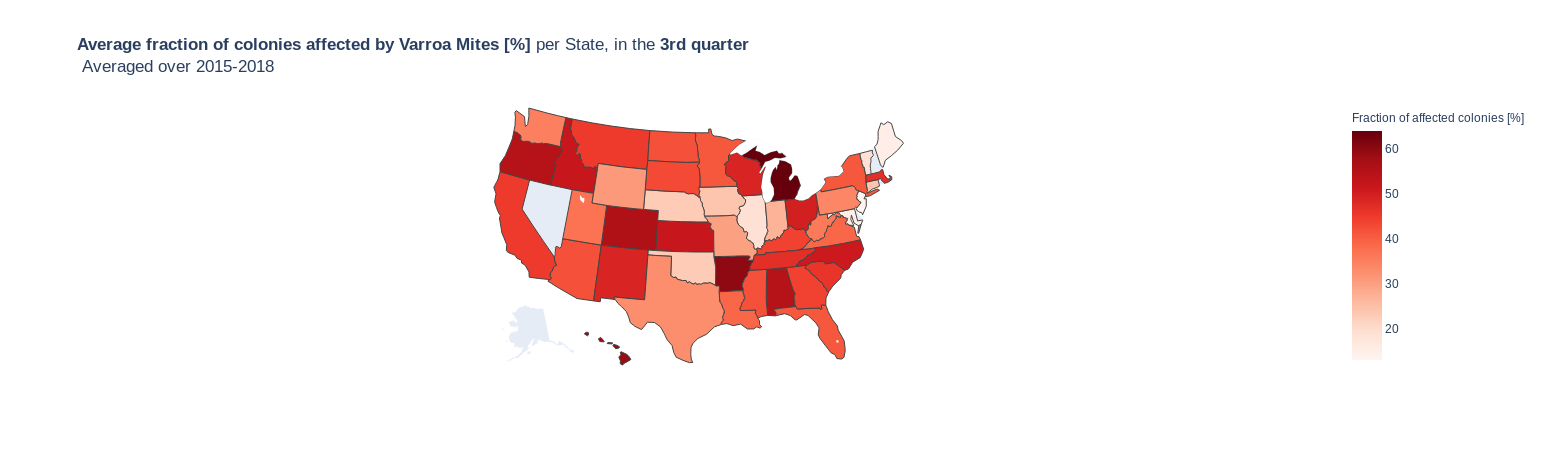

In [113]:
for quarter, word in zip(['Q1', 'Q3'], ['1st', '3rd']):
    fig = go.Figure(data=go.Choropleth(
        locations=varroa_per_state[varroa_per_state.period == quarter]['state'],
        z=varroa_per_state[varroa_per_state.period == quarter]['value'].astype(float).apply(round),
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='Fraction of affected colonies [%]',
    ))

    fig.update_layout(
        title_text = '<b>Average fraction of colonies affected by Varroa Mites [%]</b> per State, in the <b>' + word + ' quarter</b> <br> Averaged over 2015-2018',
        geo_scope='usa', # limite map scope to USA
        dragmode=False
    )

    fig.show()

### Analysis 

Varroas are a **widespread problem**, affecting between 20 and 50% of all colonies within a state. 

In the **summer**, the Varroas of the **North-East** tend to **die off**, while the rest of the US maintains a high count of Varroas.

This is especially an issue since **California** is the **state with the most colonies** by far, and it also is one of the states with the most varroas per colonies in the winter.

Unfortunately, February to March is precisely when the almond trees bloom, and hence when the bees are in California.

## What about the other pests ?

Varroas have been a hot-topic in the bee community, but what about other pests ? Are they as widespread and as endemic ?

In [65]:
non_varroa

,year,period,state,value
97,2018,Q1,AL,30.2
99,2018,Q1,AZ,4.3
101,2018,Q1,AR,9.6
103,2018,Q1,CA,11.3
105,2018,Q1,CO,0.8
...,...,...,...,...
1601,2015,Q4,VA,17.2
1603,2015,Q4,WA,0.1
1605,2015,Q4,WV,4.5
1607,2015,Q4,WI,15.6


Text(0, 0.5, 'Fraction of colonies affected the by pest \n (excluding the Varroa) [%]')

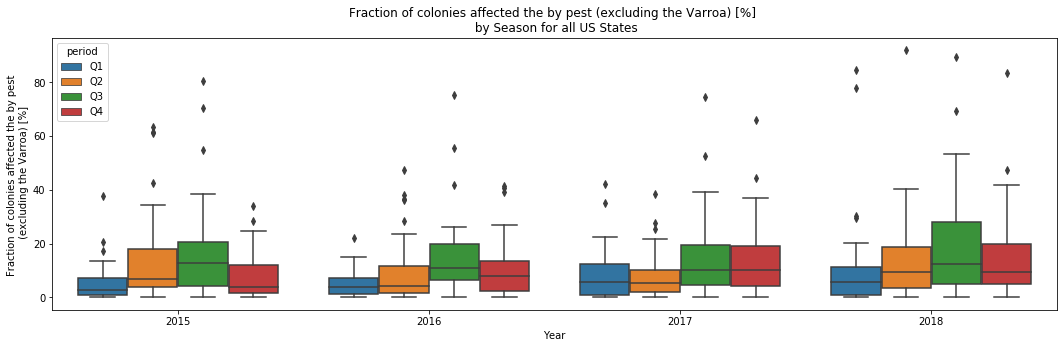

In [66]:
plt.figure(figsize=(18,5))
sns.boxplot(y='value', x='year', hue='period', data=non_varroa)
plt.title('Fraction of colonies affected the by pest (excluding the Varroa) [%] \n by Season for all US States')
plt.xlabel('Year')
plt.ylabel('Fraction of colonies affected the by pest \n (excluding the Varroa) [%]')

## Analysis 


Other pests follow the same patterns (i.e. growing from end of the winter to summer, and dying off in winter). Additionally, they are **well widespread** throughout the US, affecting each state. However, **Varroas are more endemic**, affecting far more beehives. We however notice a lot of outliers.

## Pesticide

Another potential culprit is the use of pesticide. In 2013, Europe banned the use of neonicotinoid, a pesticide believed to contribute to CCD [[1]](https://en.wikipedia.org/wiki/Colony_collapse_disorder#Bee_rentals_and_migratory_beekeeping).

Unfortunately, the data available from the USDA concerning pesticide does not contain pesticide-specific data. Is there however similar patterns between CCD and pesticide use ?



In [89]:
pesti = pd.read_csv("data/USDA_pesticide.csv")
pesti.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2019,JAN THRU MAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",TOTAL,NOT SPECIFIED,13.6,NaN
1,SURVEY,2019,JAN THRU MAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",TOTAL,NOT SPECIFIED,0.3,NaN
2,SURVEY,2019,JAN THRU MAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",TOTAL,NOT SPECIFIED,16.2,NaN
3,SURVEY,2019,JAN THRU MAR,NaN,STATE,ARKANSAS,5.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",TOTAL,NOT SPECIFIED,55.3,NaN
4,SURVEY,2019,JAN THRU MAR,NaN,STATE,CALIFORNIA,6.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",TOTAL,NOT SPECIFIED,12.3,NaN


In [90]:
# Clean header
pesti.columns = [column.strip().lower() for column in pesti.columns]

# lowercase the state
pesti.state = pesti.state.apply(str.lower)

# Discard the 3 rows with less than 5 hives
pesti = pesti[pesti.domain == 'TOTAL']

# Keep relevant columns
PESTI_TO_KEEP = ['year', 'period', 'state', 'value']
pesti = pesti[PESTI_TO_KEEP]

# Replace month ranges by quarters
pesti.replace(to_replace=quarters, inplace=True)

# Discard rows where the value wasn't reported 
pesti = pesti[pesti.value.apply(lambda x: x != ' (Z)')] # only keep US states
pesti.value = pesti.value.apply(float)

# Replace state by 2-letters symbol
pesti.replace(to_replace=states, inplace=True)

# only keep US states
pesti = pesti[pesti.state.apply(lambda x: x in states.values())] 

# Discard 2019
pesti = pesti[pesti.year != 2019]

In [91]:
pesti.head(3)

,year,period,state,value
48,2018,Q1,AL,14.9
49,2018,Q1,AZ,15.3
50,2018,Q1,AR,23.0


In [92]:
pesti_per_state = pesti.groupby(['state', 'period']).mean().reset_index()

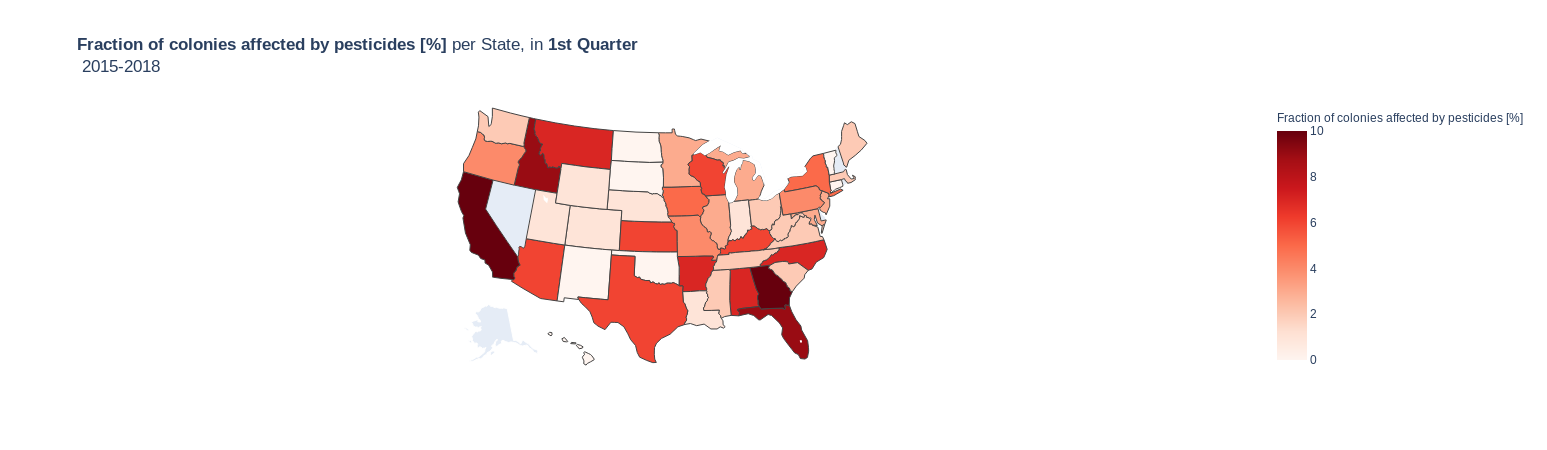

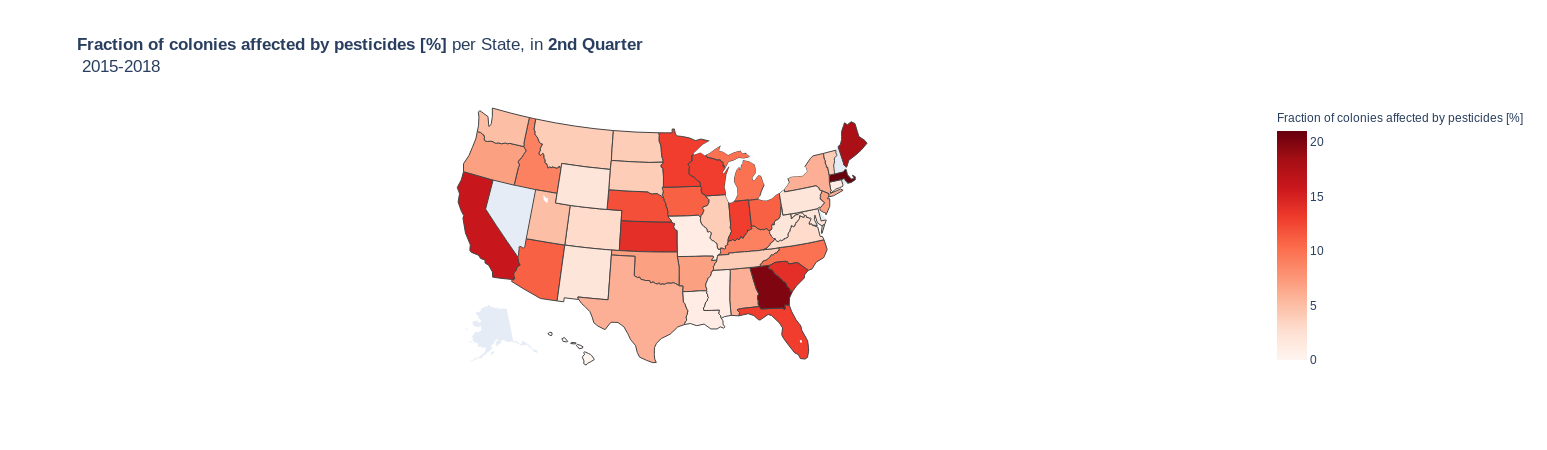

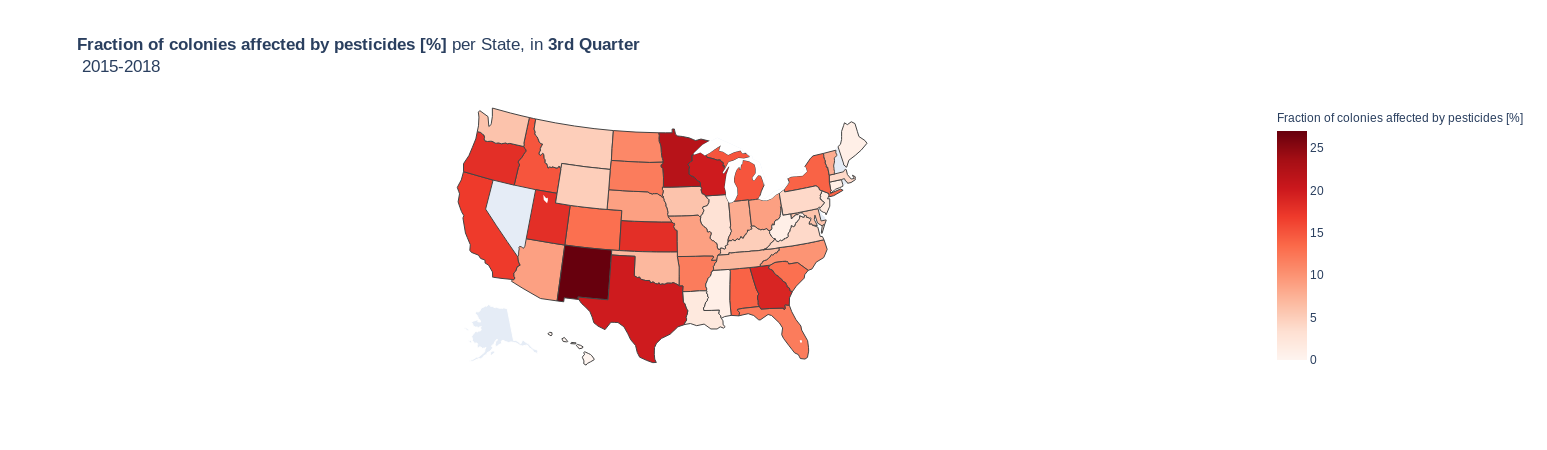

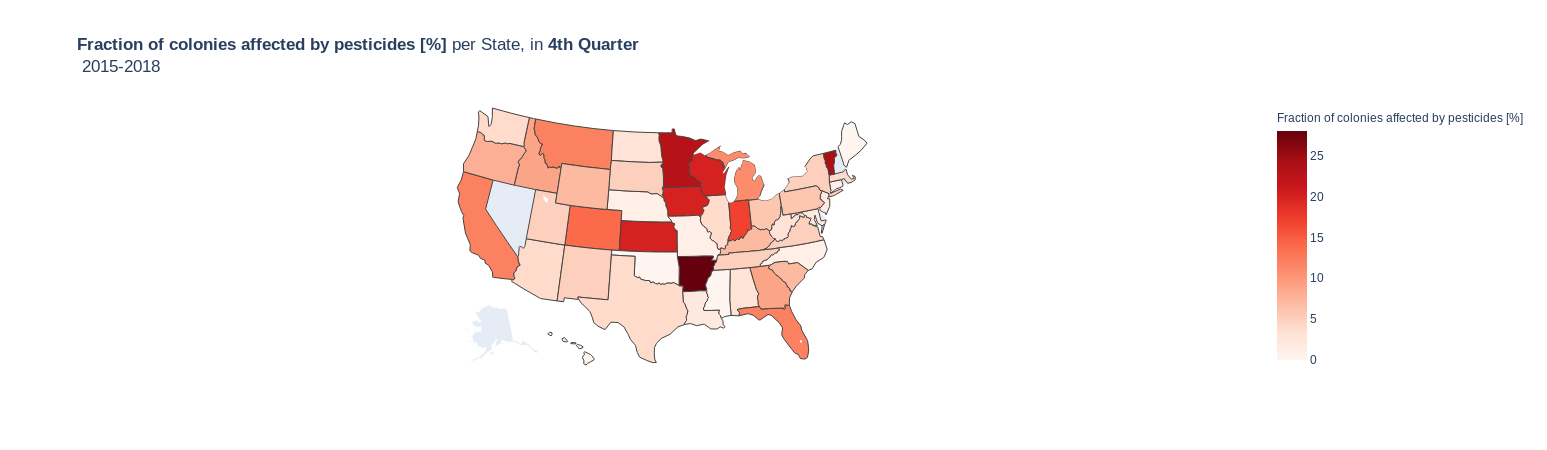

In [107]:
for quarter, word in zip(['Q1', 'Q2', 'Q3', 'Q4'], ['1st', '2nd', '3rd', '4th']):
    fig = go.Figure(data=go.Choropleth(
        locations=pesti_per_state[pesti_per_state.period == quarter]['state'],
        z=pesti_per_state[pesti_per_state.period == quarter]['value'].astype(float).apply(round),
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title='Fraction of colonies affected by pesticides [%]',
    ))

    fig.update_layout(
        title_text = '<b>Fraction of colonies affected by pesticides [%]</b> per State, in <b>' + word + ' Quarter</b> <br> 2015-2018',
        geo_scope='usa', # limite map scope to USA
        dragmode=False
    )

    fig.show()

### Analysis 

Pesticide levels increase from the 1st to the 4th quarter all over the US. But is there a correlation ?



## 5. California accounts for 80% of the world almond production, what is the impact of bees on this industry in the 21st century?

Calfornia is responsible for more than 80% of the world almond production. [[1]](https://www.marketwatch.com/story/almond-crunch-california-drought-withers-world-supply-2014-03-11)
Almonds need honey bees to be polinized. [[2]](https://theconversation.com/a-bee-economist-explains-honey-bees-vital-role-in-growing-tasty-almonds-101421)

As we have seen above, **California** has an **average annual loss** of colonies of **36%**. 
What does this mean in terms of Almonds production ?


In [90]:
# As per the pdf from the USDA, the almond productions has tripled in the last 20 years. 
california_almond = pd.read_excel('data/california_USDA_almond.xlsx')
california_almond.head()

,year,bearing,non_bearing,yield_per_acre,production,price_per_pound,value_of_production
0,1997,442000,63000,1720,759,1.56,1160640.0
1,1998,460000,120000,1130,520,1.41,703590.0
2,1999,485000,115000,1720,833,0.86,687742.0
3,2000,510000,100000,1380,703,0.97,666487.0
4,2001,530000,75000,1570,830,0.91,740012.0


In [124]:
# Convert to kg
california_almond.yield_per_acre *= 0.453592
california_almond.production *= 0.453592


## Production of Californian almonds 
#### 1997-2017


Text(0, 0.5, 'Almond production\n [Million of kg]')

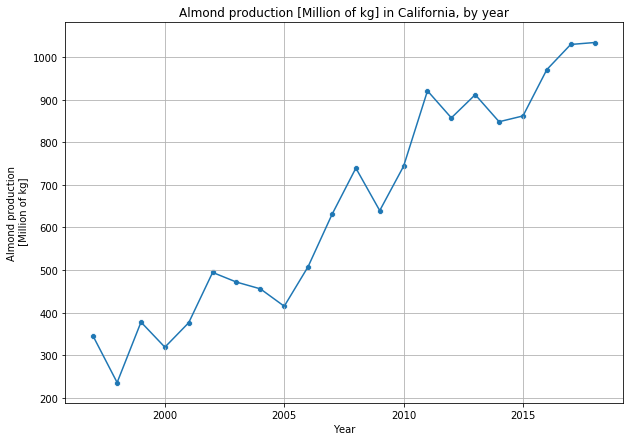

In [135]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='production', data=california_almond)
sns.scatterplot(x='year', y='production', data=california_almond)

plt.title('Almond production [Million of kg] in California, by year')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Almond production\n [Million of kg]')

Text(0, 0.5, 'Yield per acre [kg/acre]')

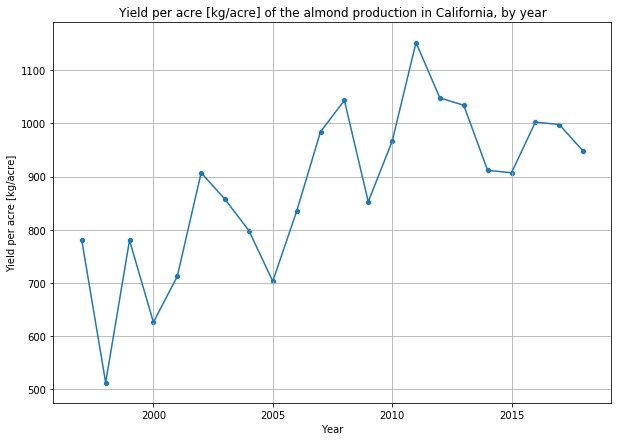

In [134]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='yield_per_acre', data=california_almond)
sns.scatterplot(x='year', y='yield_per_acre', data=california_almond)

plt.title('Yield per acre [kg/acre] of the almond production in California, by year')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Yield per acre [kg/acre]')

### Analysis

As we can see, the death of bees has not prevented the Californian almond industry to increase its production, as well as the amount of almonds produced per area.

This is due to the fact that bees are imported.